> This is my First Competition in Kaggle!!!
> Looking forward to learn a lot
# Import necessary libraries and load the data

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Loading the data in pandas dataframe
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test = pd.read_csv("../input/titanic/test.csv")
test = test.merge(gender_submission,on='PassengerId')
train = pd.read_csv("../input/titanic/train.csv")
print(train.info())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence

# Analysing the data in each column

In [211]:
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.', expand=False)
print(train.Title.value_counts())
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.', expand=False)
train.Title.isin(test.Title)
print(test.Title.value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Countess      1
Lady          1
Don           1
Jonkheer      1
Mme           1
Capt          1
Ms            1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64


In [212]:
def data_clean(df):
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)
    #assign a value for missing titles
    df['Title'] = df['Title'].fillna('NoTitle')
    #Unify titles
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    new_y = df.Survived
    new_X = df.drop(columns = ['Survived','Ticket','Name','Cabin'])
    new_X=new_X.set_index('PassengerId')
    new_X.info()
    
    return new_X,new_y
X_train,y_train = data_clean(train)
X_train.info()
X_test,y_test = data_clean(test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 no

# Categorizing the Age and Fare columns
# Filling the missing values

In [213]:
def categor_age_fare(df):
    print(df.info())
    # fill missing values
    df.Age=df.Age.fillna(df.Age.median())
    #create bands for age
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[ (df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[ (df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[ (df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4
    df['Age'] = df['Age'].astype(int)

    df.Fare=df.Fare.fillna(df.Age.median())
    #create bands for fare
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[ (df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[ (df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare'] = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df.Fare = df.Fare.astype(int)
    return df

X_train = categor_age_fare(X_train)
print(X_train.info())
X_test = categor_age_fare(X_test)
print(X_test.info())
X= pd.concat([X_train,X_test])
train['Agegrouped']=X_train.Age

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Embarked    889 non-null object
Title       891 non-null object
dtypes: int64(5), object(3)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null

# Filter categorical columns using mask and turn it into a list

In [214]:
categorical_feature_mask = X_train.dtypes==object
categorical_cols = X_train.columns[categorical_feature_mask].tolist()

# Generate LastName column from Name by using the separator ','

In [215]:
train['LastName'] = train.Name.apply(lambda x:x.split(sep=',')[0])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
Agegrouped     890 non-null float64
LastName       891 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 104.5+ KB


# Import labelencoder to encode categorical values

In [216]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
X_train.Sex = le.fit_transform(X_train.Sex)
X_test.Sex = le.fit_transform(X_test.Sex)
X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().idxmax())
X_train.Embarked = le.fit_transform(X_train.Embarked)
X_test.Embarked = X_test.Embarked.fillna(X_test['Embarked'].value_counts().idxmax())
X_test.Embarked = le.fit_transform(X_test.Embarked)
X_train.Title = X_train.Title.fillna(X_train['Title'].value_counts().idxmax())
X_train.Title = le.fit_transform(X_train.Title)
X_test.Title = X_test.Title.fillna(X_test['Title'].value_counts().idxmax())
X_test.Title = le.fit_transform(X_test.Title)

# Encoding the categorical values with one hot encoder

In [217]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [0,2,5,6,7])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)
X_ohe_train = np.array(ct.fit_transform(X_train), dtype=np.float)
X_ohe_test = np.array(ct.fit_transform(X_test), dtype=np.float)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

# Feature scaling needs to be done for continuous columns

In [218]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0, 1))
# To scale data 
X_train_minmax = X_ohe_train
X_test_minmax = X_ohe_test
X_train_minmax[:,14:17]=min_max.fit_transform(X_train_minmax[:,14:17])
X_test_minmax[:,14:17]=min_max.fit_transform(X_test_minmax[:,14:17])

# Lets visualize the the data grouped by Sex

percentage of people survived : 38.0


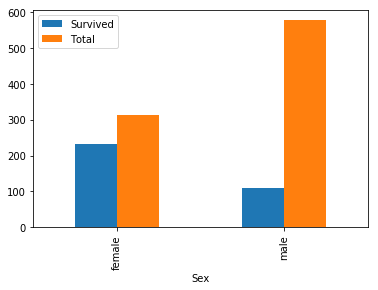

In [219]:
# of people survived grouped by sex
print("percentage of people survived :",round(y_train.sum()/y_train.count(),2)*100)
groupby_sex = train.groupby('Sex').sum().Survived.to_frame()
groupby_sex['Total'] = train.groupby('Sex').count().Survived
groupby_sex.plot.bar()
plt.show()

# Lets visualize the the data grouped by Age

percentage of people survived : 38.0


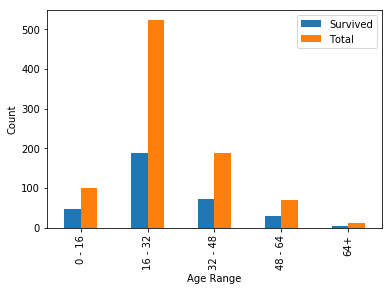

In [223]:
# of people survived grouped by age
print("percentage of people survived :",round(y_train.sum()/y_train.count(),2)*100)
groupby_age = train.groupby('Agegrouped').sum().Survived.to_frame()
groupby_age['Total'] = train.groupby('Agegrouped').count().Survived
groupby_age.index = groupby_age.index.map({0:'0 - 16',1:'16 - 32',2:'32 - 48',3:'48 - 64',4:'64+'})
groupby_age.plot.bar()
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

# Lets visualize the the data grouped by Title

percentage of people survived : 38.0


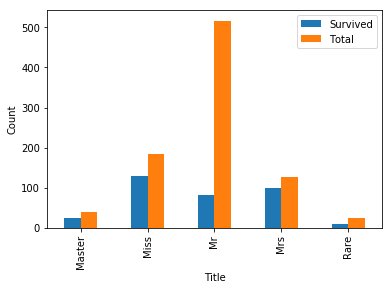

In [227]:
# of people survived grouped by age
print("percentage of people survived :",round(y_train.sum()/y_train.count(),2)*100)
groupby_title = train.groupby('Title').sum().Survived.to_frame()
groupby_title['Total'] = train.groupby('Title').count().Survived
groupby_title.plot.bar()
plt.ylabel('Count')
plt.show()

> From the above visualization, we can understand that '**Mrs**' have survived a lot than '**Miss**'.
> So it conveys that the married women have more probability to survive than unmarrieds.

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
#X_train = MinMaxScaler().fit_transform(X_train)
lr.fit(X_train_minmax,y_train)
y_pred = lr.predict(X_test_minmax)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",lr.score(X_test_minmax, y_test))

# Random Forest Classifier

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_minmax,y_train)

y_pred=clf.predict(X_test_minmax)

# Find accuracy of each model

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
# Model Accuracy, how often is the classifier correct?
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",Accuracy)
roc_score = roc_auc_score(y_test, y_pred)
print("ROC_AUC_SCORE : ",roc_score)
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",CM)
report = classification_report(y_test, y_pred)
print("Classification Report :\n",report)

# Neural Network using tensorflow

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(20, activation='relu',input_shape=(X_train_minmax.shape[1],)))
model.add(Dense(20, activation='softmax'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

#compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

#train model
model.fit(X_train_minmax, y_train, validation_split=0.3, epochs=50, callbacks=[early_stopping_monitor])

In [ ]:
y_pred = (model.predict(X_test_minmax)>=0.5).astype('int64')
accuracy = model.evaluate(X_test_minmax,y_test,verbose = 0)[1]
print("Accuracy score of the neural network is :",accuracy)

# Generating the final results and saving it in a CSV file

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
# Model Accuracy, how often is the classifier correct?
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",Accuracy)
roc_score = roc_auc_score(y_test, y_pred)
print("ROC_AUC_SCORE : ",roc_score)
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",CM)
report = classification_report(y_test, y_pred,output_dict=True)
print("Classification Report :\n",report)

In [ ]:
final_results = pd.DataFrame(y_pred, columns = ['Survived'])
final_results['PassengerId'] = gender_submission.PassengerId
final_results=final_results.set_index('PassengerId')
final_results.to_csv('FinalResults-'+str(round(accuracy,2))+str(CM[0][1])+str(CM[1][0])+'.csv')
print("Output CSV file has been saved "+'FinalResults-'+str(round(accuracy,2))+str(CM[0][1])+str(CM[1][0])+'.csv')